# **WU Executive Academy**
## Data Analysis for Evaluation and Experimentation


This tutorial aims to provide the basics tools required to analysis and compare the positive/negative effects of a new measure or experiment undertaken within an organization.

In what follows, we will analyse the results of an experiment carried out by the Insitute for Digital Ecosystems. We will:


**1.   Understanding the experiment setting and the data**

Before jumping into the analysis with R tools and methods. We will briefly introduce the experiment. This stage is essential to guarantee that we can exploit the data.

**2.   Analysis and visualization of the dataset**

We will load the dataset from the following GitHub repository https://github.com/santiago-ruiz-moreno/InformationSystemsManagementPublicGoodsGame.git. Then we will identify the relevant variables in the dataset, generate cross-tables, and main stats outputs.
In order to use these two datasets in Google Colab, they will need o be loaded manually within the console at the left.

**3.   T-test and Mann-Whitney test**

In base on the first findings, we will perform some statistical tests to validate or refute the results of the experiment./

**4.   Linear regression model**


The experiment consisted on a public goods game in which 4 people were given an initial amount of tokens at the begining of each round. Then, they have to decide how many of these tokens they will give to a common pot







# Experimental setting

In our experiment, we formed groups composed by an x number of participants. Each participant was then given a certain amount of tokens/money, in this case 10 tokens. These were equivalent to the "wealth" or "income" of the individuals.

Then they were invited to contribute a certain amount of their tokens to a common  account/pot. Next, the total amount of money that was colllected was multiplied by a productivity factor, divided by 4, and allocated among the participants. The resulting amount was then distributed to the 4 players, and the game reinitiated to zero and played again.

In order to see whether participants from the WU Executive Bussiness Academy were more prone to contribute we compared the results of the experiment with those of a group of WU students exposed under the same contidions to the same experiment.

**1.**   WU Master Students --> Control Group

**2.**   WU Executive Academy Students ---> Treatment Group. (In this case the treatment can be thought as the exposition to a 2 days journey about information systems amnagement)


Example of a public goods game retrived from http://web.evolbio.mpg.de/evoltheo_corona/articles/AT_SocialDistDilemma/index_eng.html

![](https://drive.google.com/uc?export=view&id=19Bg_lYA8O0hkG0EAocIfDj8GXogPXQgu
)


# Analysis and visualization

In [25]:
# Loading and installing R libraries
library("dplyr")
library("ggplot2")
library("scales")
library("stats")

In [8]:
# Loading the dataset
control_group <- read.csv("/content/Public_goods_group1.csv")
# Checking the variables that are in the datasets
colnames(control_group)

[1] "X"               "group"           "playerID"        "round"          
 [5] "contribution"    "Payoff"          "TotalPayoff"     "age"            
 [9] "colorPreference" "gender"          "major"

In [9]:
# Dimension of the dataframe for the control group
dim(control_group)

[1] 254  11

**Exercise 1**. Export the second dataframe and call it treatment_group

In [12]:
control_group['experimental_group'] = "control"
treatment_group['experimental_group'] = "treatment"

In [54]:
control_group['unique_group_id'] = paste(control_group$group,"_c")
treatment_group['unique_group_id'] = paste(treatment_group$group,"_t")

In [55]:
# Concatanating the two dataframes
exprt_data <- rbind(control_group,treatment_group)
dim(exprt_data)

[1] 480  13

In [77]:
# Taking a look to the data
head(exprt_data)

,X,group,playerID,round,contribution,Payoff,TotalPayoff,age,colorPreference,gender,major,experimental_group,unique_group_id
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2,716,1,2,16.5,16.5,23,red,female,compscie,control,2 _c
2,2,2,716,2,2,15.0,31.5,23,red,female,compscie,control,2 _c
3,3,2,716,3,2,18.5,50.0,23,red,female,compscie,control,2 _c
4,4,2,716,4,1,21.0,71.0,23,red,female,compscie,control,2 _c
5,5,2,716,5,1,20.0,91.0,23,red,female,compscie,control,2 _c
6,6,10,719,1,6,15.0,15.0,23,blue,female,business,control,10 _c


In [57]:
# How many participants participated in the experiment ?

total_number_participants <- length(unique(exprt_data$playerID))

print(paste0("There was this number of participants on the experiment:  ", total_number_participants))


[1] "There was this number of participants on the experiment:  89"


In [58]:
# Who were the player ID's that earned the most for the total number of rounds ?

grouped_by_player_ID <- exprt_data %>%
    group_by(playerID
    ) %>%
    summarise(
        TotalPayoffPlayerID = mean(TotalPayoff),
        N = n()
    )

grouped_by_player_ID[order(-grouped_by_player_ID $TotalPayoffPlayerID), ]

playerID,TotalPayoffPlayerID,N
<int>,<dbl>,<int>
746,65.60,5
756,57.90,5
760,56.40,5
750,55.50,5
767,54.90,10
496,53.70,5
488,53.60,5
749,53.30,5
716,52.00,5


**Exercise 2.** How many groups of 4 students in total (WU Executive Academy and Master students) participated in the experiment ?

**Exercise 3.** Which group earned the most TotalPayoffs?

In [61]:
by_unique_group_id <- exprt_data %>%
    group_by(unique_group_id
    ) %>%
    summarise(
        TotalPayoffGroup = sum(TotalPayoff),
        N = n()
    )

by_unique_group_id[order(- by_unique_group_id$TotalPayoffGroup), ]

unique_group_id,TotalPayoffGroup,N
<chr>,<dbl>,<int>
11 _t,1049.0,20
8 _t,1008.0,20
5 _t,973.0,20
7 _t,960.0,20
4 _c,959.0,20
3 _c,957.0,20
6 _c,931.0,20
5 _c,905.0,20
9 _c,883.5,20


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


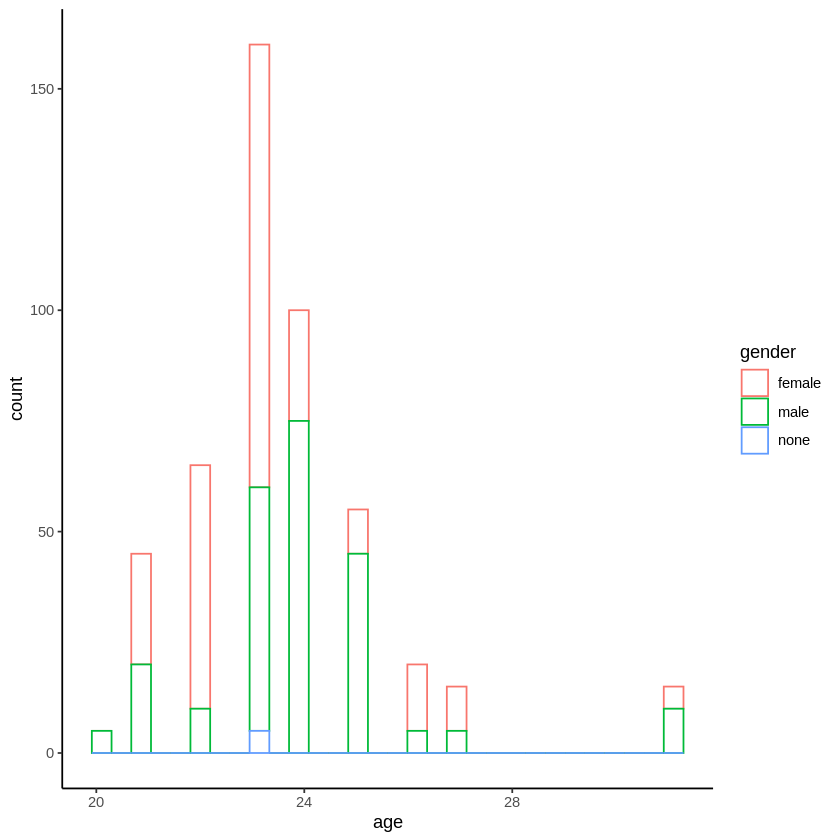

In [62]:
# Analyzing the distribution of demographic variables
# Histograms
ggplot(exprt_data, aes(x=age, color=gender)) +
  geom_histogram(fill="white") + theme_classic()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


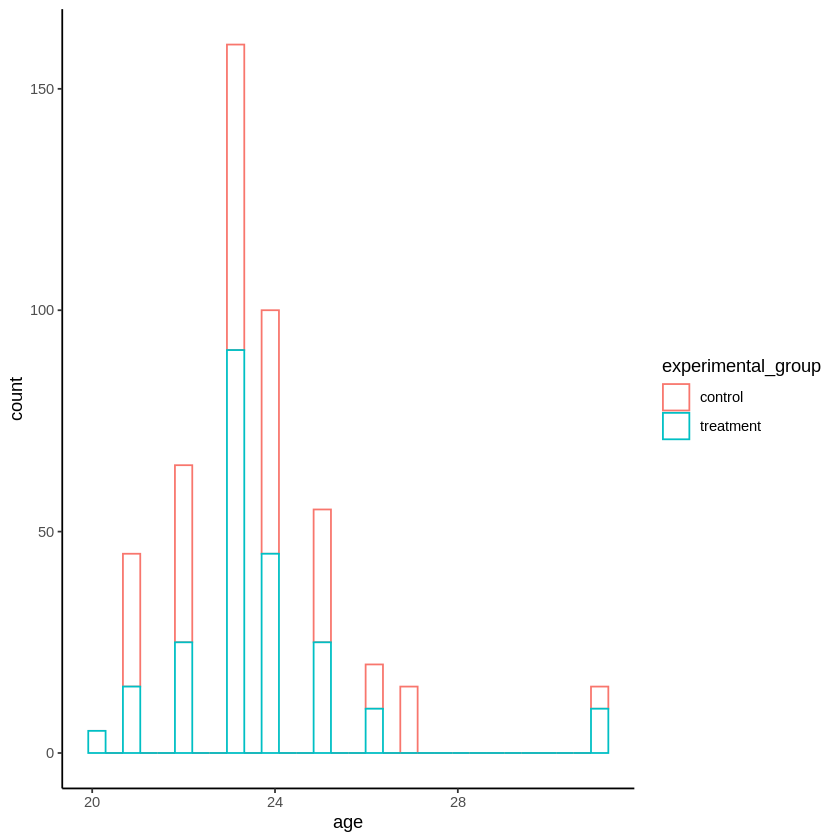

In [63]:
# Analyzing the dsibtribution of age for the the control, and the treatment groups
ggplot(exprt_data, aes(x= age, color= experimental_group)) +
  geom_histogram(fill="white") + theme_classic()

**Exercise 3.**
1.  What can you say about these graphs ?
2.  Should we expect any type of bias ?







In [64]:
# Summary stats with Dplyr

result_by_treatment <- exprt_data %>%
  group_by(experimental_group) %>%
  summarise(
    sd_contribution = sprintf("%.2f", sd(contribution,na.rm = TRUE)),
    mean_contribution = sprintf("%.2f",mean(contribution,na.rm = TRUE)),
    max_contribution = sprintf("%.2f",max(contribution,na.rm = TRUE)),
    min_contribution = sprintf("%.2f", min(contribution,na.rm = TRUE)),
    sd_generated_surplus = sprintf("%.2f", sd(Payoff - contribution,na.rm = TRUE)),
    mean_generated_surplus = sprintf("%.2f",mean(Payoff - contribution,na.rm = TRUE)),
    max_generated_surplus = sprintf("%.2f",max(Payoff - contribution,na.rm = TRUE)),
    min_generated_surplus = sprintf("%.2f", min(Payoff - contribution,na.rm = TRUE)),
    N =  n()
  )

result_by_treatment


experimental_group,sd_contribution,mean_contribution,max_contribution,min_contribution,sd_generated_surplus,mean_generated_surplus,max_generated_surplus,min_generated_surplus,N
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
control,3.38,4.53,10.00,0.00,5.65,9.64,22.00,-8.00,254
treatment,3.76,4.79,10.00,0.00,6.29,9.16,25.00,-6.00,226


**Exercise 4**
1. In which of the groups (Either control group or treatment group) there seems to be observations missing for the the variables contribution or payoff ?
2. Find the groups for which the number of participants may be different from zero (you can ask ChatGPT for help...) ?

In [118]:
# We delete the results of a round for a participant, if the value of one of the variables is NA
non_na_exprt_data <- na.omit(exprt_data_clean)

In [119]:
# Keeping only the groups where all the oservations/rounds/participants are completed
number_participants_per_group <- non_na_exprt_data %>%
group_by(unique_group_id) %>%
summarise(
    N = n()
  )

# Groups containing a missing data in at least one of the rounds
validated_records <- number_participants_per_group[number_participants_per_group$N == 20,]

In [120]:
# Keeping only complete groups
exprt_data_clean <- non_na_exprt_data[(non_na_exprt_data$unique_group_id %in%  validated_records$unique_group_id),]
dim(exprt_data_clean)

[1] 260  13

**Exercise 5**
1. How many observations would we potentially drop if we drop all the groups that are incomplete?
2. What other methods do you know that we could have used ?

In [121]:
# Analyzing the different effects of the treatments in comparison to the control group


result_by_treatment <- exprt_data_clean %>%
  group_by(experimental_group) %>%
  summarise(
    sd_relative_contribution = sprintf("%.2f", sd(contribution)),
    mean_relative_contribution = sprintf("%.2f",mean(contribution)),
    max_relative_contribution = sprintf("%.2f",max(contribution)),
    min_relative_contribution = sprintf("%.2f", min(contribution)),
    sd_generated_surplus = sprintf("%.2f", sd(Payoff - contribution)),
    mean_generated_surplus = sprintf("%.2f",mean(Payoff - contribution)),
    max_generated_surplus = sprintf("%.2f",max(Payoff - contribution)),
    min_generated_surplus = sprintf("%.2f", min(Payoff - contribution)),
    N =  n()
  )

  result_by_treatment


experimental_group,sd_relative_contribution,mean_relative_contribution,max_relative_contribution,min_relative_contribution,sd_generated_surplus,mean_generated_surplus,max_generated_surplus,min_generated_surplus,N
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
control,3.25,4.16,10.00,0.00,5.27,10.00,21.50,-5.00,160
treatment,3.94,5.58,10.00,0.00,6.29,10.00,25.00,-5.00,100


**Exercise 6**
1. What can you say from the results on the table ?
2. How you can corroborate these results ?

In [124]:
# Summarizing the observations per participant/group and treatment

table_by_part_code <-exprt_data_clean %>%
    group_by(
        playerID,
        round,
        unique_group_id,
        experimental_group

    ) %>%
    summarise(
        rel_cont = contribution/10,
        generated_surplus = Payoff - contribution,
        gender = unique(gender),
        groups = TRUE
    )


`summarise()` has grouped output by 'playerID', 'round', 'unique_group_id'. You
can override using the `.groups` argument.


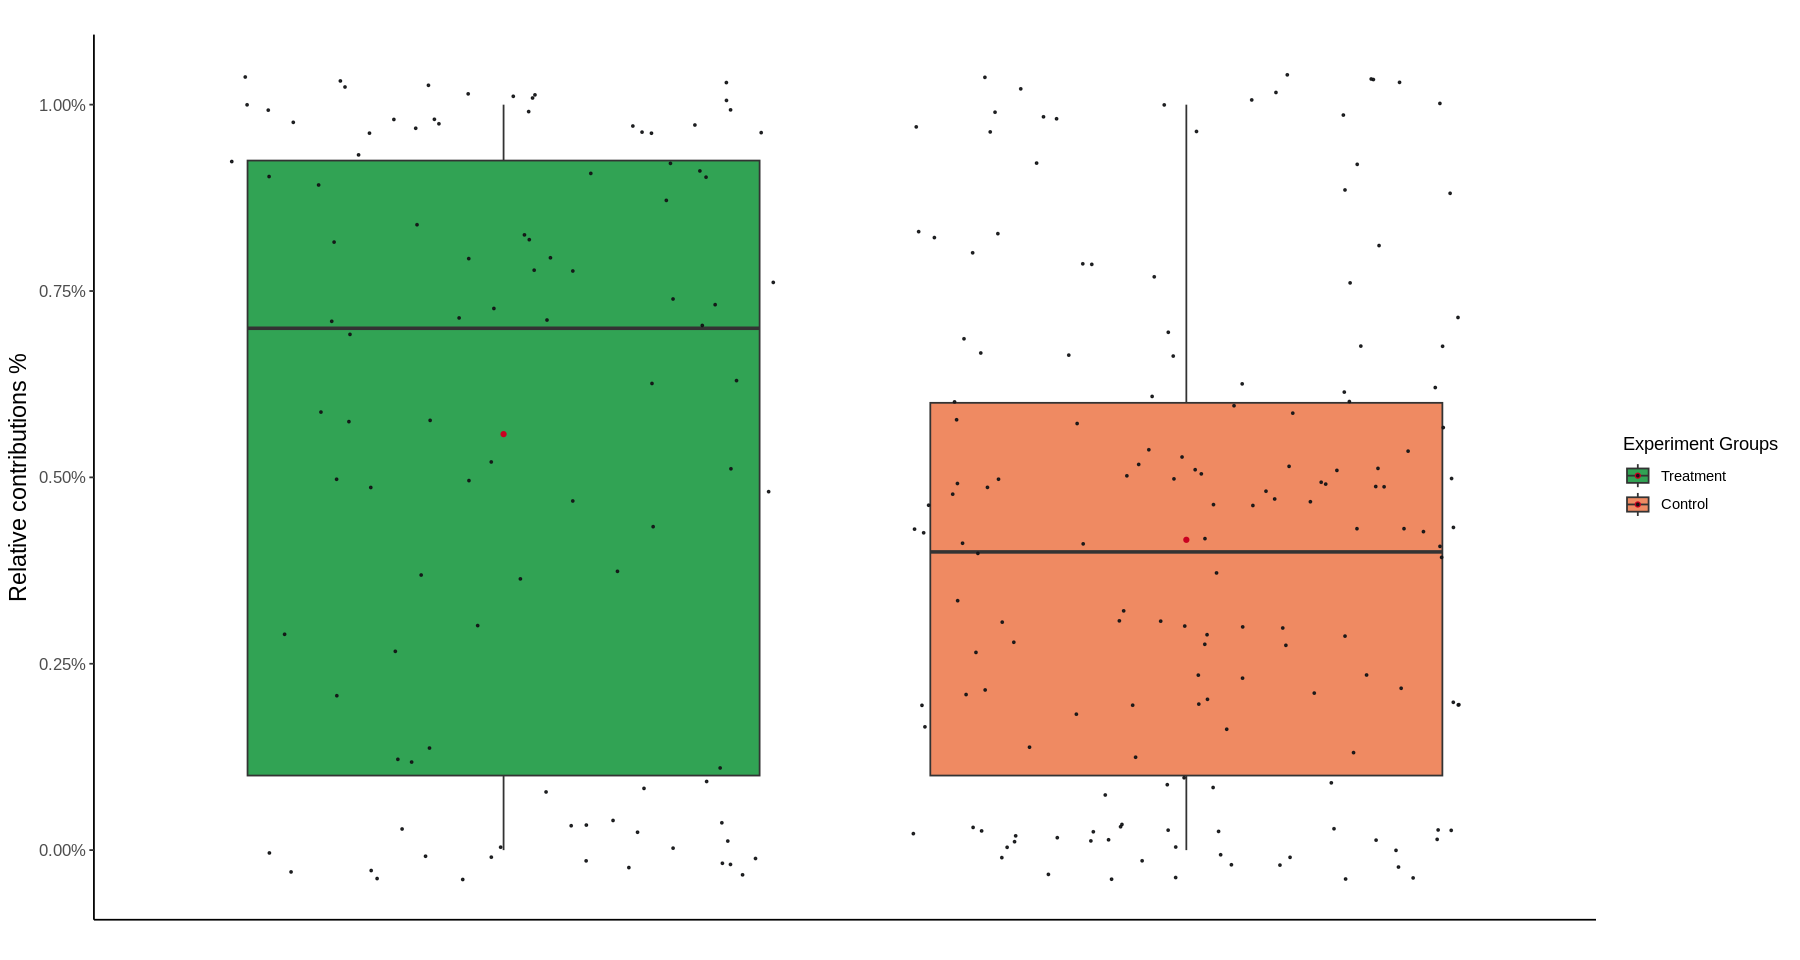

In [125]:
# changing dimension from the graph
options(repr.plot.width=15, repr.plot.height=8)

# Boxplot for all the treatments + control groups

# Rerganizing the factors so that the control group appears first
custom_order <- c("treatment", "control")

table_by_part_code$experimental_group <- factor(
     table_by_part_code$experimental_group,
     levels = custom_order)


table_by_part_code %>%

    ggplot(aes(  y = rel_cont, x = experimental_group,

    fill = experimental_group )) +

    geom_boxplot( outlier.shape = NA  ) +

    facet_grid(rows = vars()) +

    stat_summary(fun = mean, geom = "point", size = 1.1, color = "#ca0020") +

    labs(title = "", x = "", y = "Relative contributions %", fill = "Experiment Groups") +

    theme_classic() +

    geom_jitter(color = "#121315", size = 0.4, alpha = 0.9) +
    scale_fill_manual(
    values = c( "#31a354", "#ef8a62")
    ,  labels = c("Treatment", "Control") )+

    theme(
        legend.position = "right",
        plot.title = element_text(size = 11),
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
        axis.title.x = element_text(size = 14), # Increase X-axis title size
        axis.title.y = element_text(size = 14), # Increase Y-axis title size
        axis.text.y = element_text(size = 10) # Increase Y-axis labels size
    ) +

    scale_y_continuous(labels = percent_format(scale = 1))


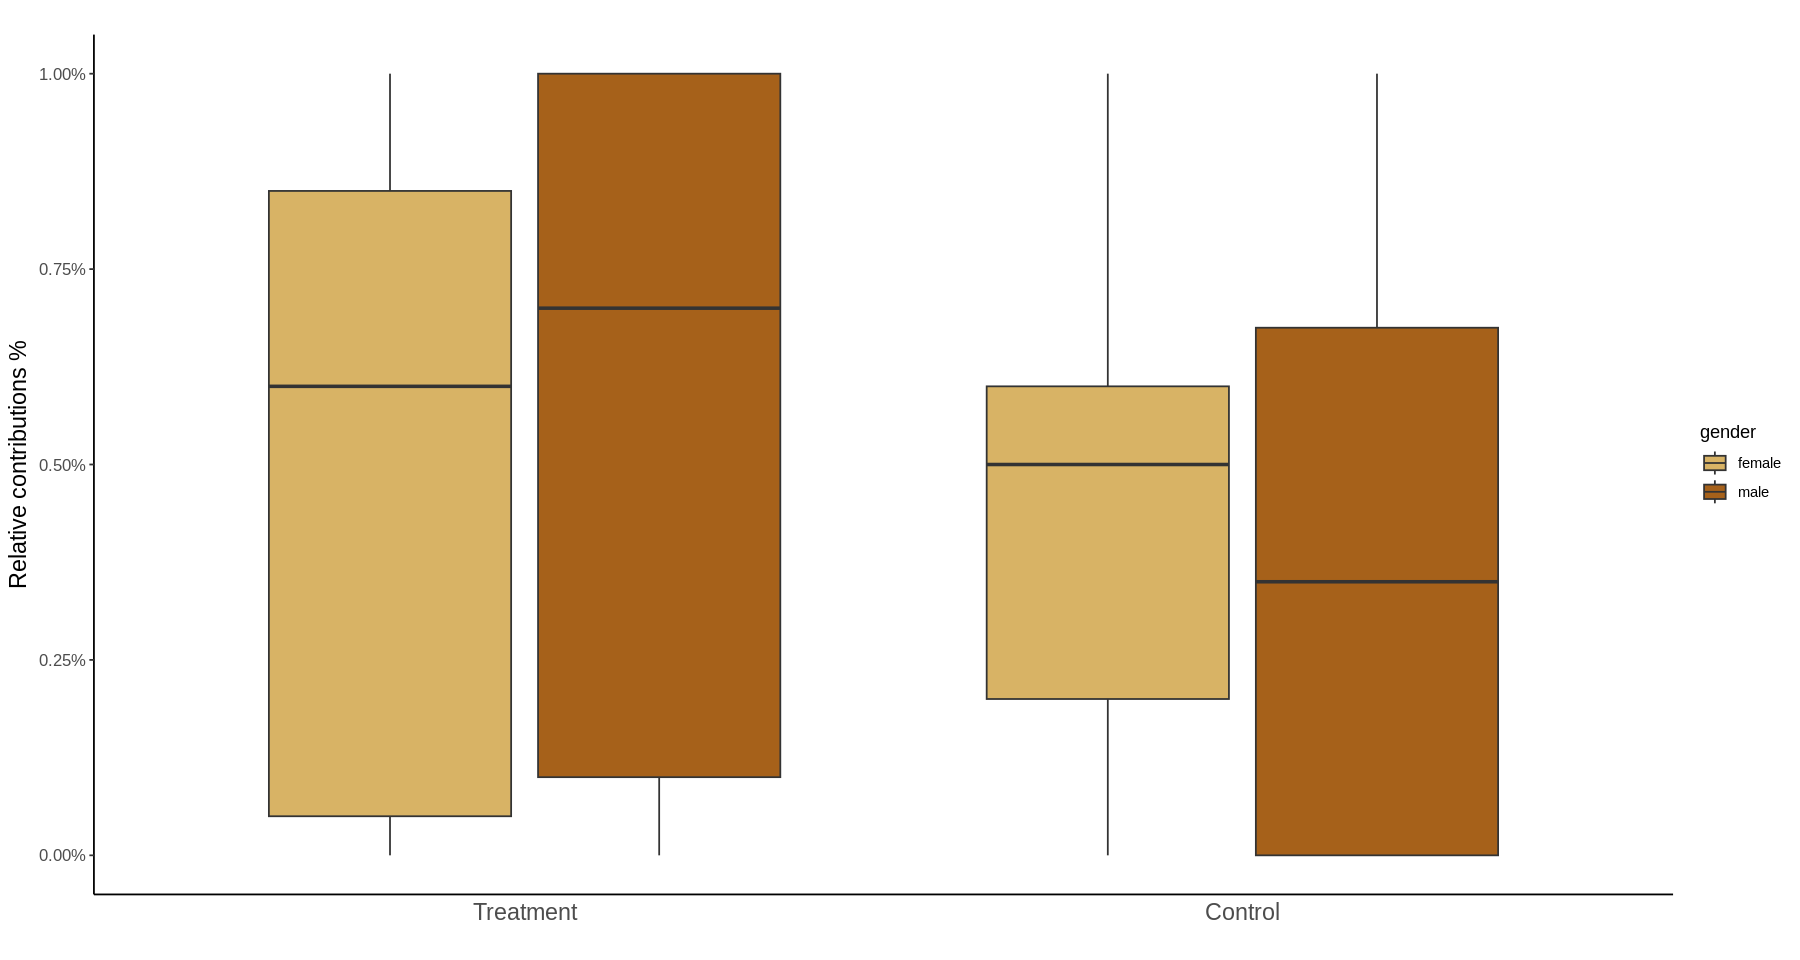

In [126]:

# Plotting the data

table_by_part_code  %>%

    ggplot(aes(
        y = rel_cont , x = experimental_group,
        fill = gender
          , width = 10, height = 10, dpi = 600)) +

    geom_boxplot( outlier.shape = NA ) +

    facet_grid(rows = vars()) +

    # Use custom color palettes
    labs(title = "", x = "",
     y = "Relative contributions %",
    fill = "gender") +

    scale_fill_manual(values = c(  "#d8b365", "#a6611a","lightblue") ) +

     scale_x_discrete(labels = c( "Treatment","Control")) +

    theme_classic() +

    theme(
        legend.position = "right",
        plot.title = element_text(size = 11),
        axis.ticks.x = element_blank(),
        axis.title.x = element_text(size = 14), # Increase X-axis title size
        axis.title.y = element_text(size = 14), # Increase Y-axis title size
        axis.text.x = element_text(size = 14), # Increase X-axis labels size
        axis.text.y = element_text(size = 10) # Increase Y-axis labels size
    ) +

     scale_y_continuous(labels = percent_format(scale = 1))


# T-Test and Mann-Whitney Test

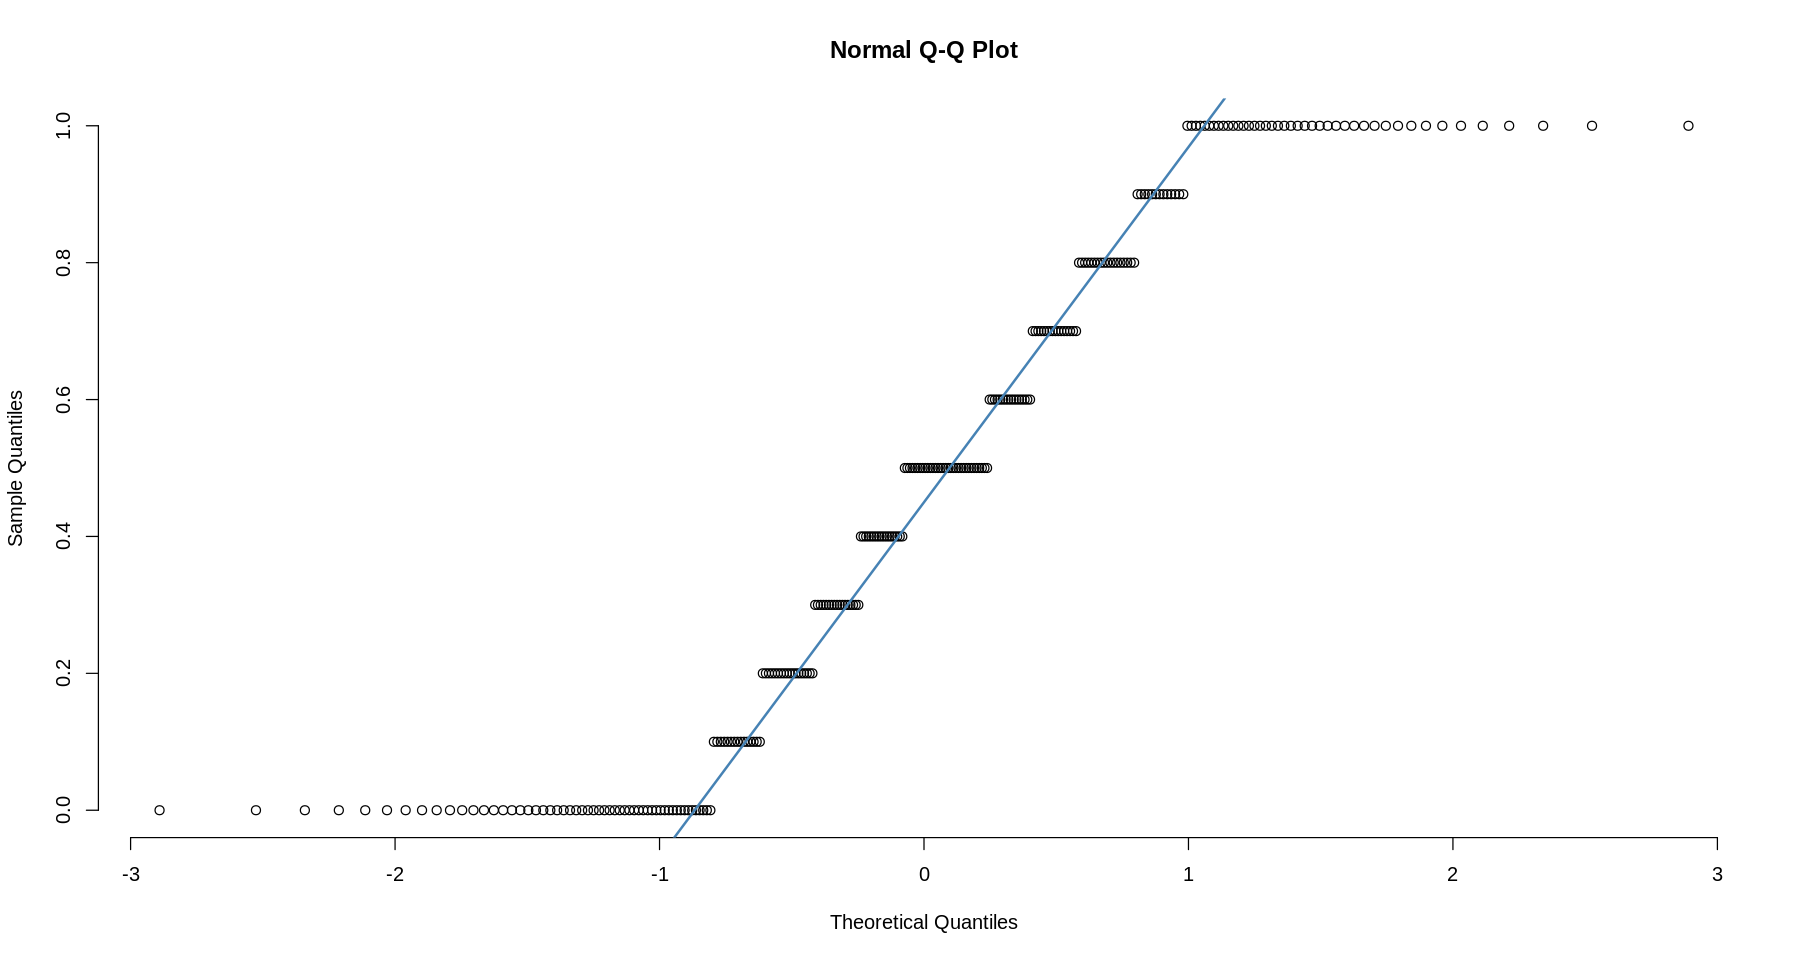

In [127]:
# If the data you are trying to test follows a normal distribution, you can carry out a t-test

qqnorm(table_by_part_code$rel_cont, pch = 1, frame = FALSE)
qqline(table_by_part_code$rel_cont, col = "steelblue", lwd = 2)


**Exercise 7**
1. Based on the image, would it be apropriate to perform a t-test ? Why?

In [128]:
# Pairwise comparisons

pairwise.t.test(table_by_part_code$rel_cont, table_by_part_code$experimental_group, p.adj = "bonf")
detach()


	Pairwise comparisons using t tests with pooled SD 

data:  table_by_part_code$rel_cont and table_by_part_code$experimental_group 

        treatment
control 0.0018   

P value adjustment method: bonferroni 

**Exercise 8**
1. If the hypothesis of normality would hold, what can you infer ?

In [129]:
# Non parametric Mann-Whitney Test

kruskal.test(unlist(table_by_part_code$rel_cont), unlist(table_by_part_code$experimental_group), alternative = "two.sided")


	Kruskal-Wallis rank sum test

data:  unlist(table_by_part_code$rel_cont) and unlist(table_by_part_code$experimental_group)
Kruskal-Wallis chi-squared = 8.6948, df = 1, p-value = 0.003191


In [130]:
pairwise.wilcox.test(table_by_part_code$rel_cont, table_by_part_code$experimental_group, p.adjust.method = "bonf",)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  table_by_part_code$rel_cont and table_by_part_code$experimental_group 

        treatment
control 0.0032   

P value adjustment method: bonferroni 

2. What can you infer from the Mann-Whitney/Wilcoxon test ?

# Mixed Regresion Model

In [131]:
# Running and interpreting the results from the linear regression

# We relevel the data
non_na_exprt_data$participant.treatment_relevel <- relevel(factor(non_na_exprt_data$experimental_group),"treatment")


In [132]:
rel_cont_mod <- lm(
  contribution / 10
  ~ round + gender * participant.treatment_relevel,
  data = non_na_exprt_data, na.action = na.exclude
)

In [133]:
rel_cont_mod


Call:
lm(formula = contribution/10 ~ round + gender * participant.treatment_relevel, 
    data = non_na_exprt_data, na.action = na.exclude)

Coefficients:
                                    (Intercept)  
                                       0.501591  
                                          round  
                                      -0.001687  
                                     gendermale  
                                       0.001404  
                                     gendernone  
                                       0.343470  
           participant.treatment_relevelcontrol  
                                      -0.023355  
gendermale:participant.treatment_relevelcontrol  
                                      -0.041497  
gendernone:participant.treatment_relevelcontrol  
                                             NA  


**Exercise 9**
1.  Why do we need to relevel the factor variable *participant.treatment* ?
2. Interpret the results